In [20]:
import fastf1 as ff
import fastf1.plotting as plotting
import json
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
ff.Cache.enable_cache('../cache')

# Loading Session, Event, Schedule and Lap

In [3]:
test_session = ff.get_session(2023, 1, 'Q')
print(type(test_session))
print(test_session.name)
print(test_session.date)
print(test_session.event)

<class 'fastf1.core.Session'>
Qualifying
2023-03-04 18:00:00
RoundNumber                                                   1
Country                                                 Bahrain
Location                                                 Sakhir
OfficialEventName    FORMULA 1 GULF AIR BAHRAIN GRAND PRIX 2023
EventDate                                   2023-03-05 20:00:00
EventName                                    Bahrain Grand Prix
EventFormat                                        conventional
Session1                                             Practice 1
Session1Date                                2023-03-03 14:30:00
Session2                                             Practice 2
Session2Date                                2023-03-03 18:00:00
Session3                                             Practice 3
Session3Date                                2023-03-04 14:30:00
Session4                                             Qualifying
Session4Date                               

In [4]:
test_event = ff.get_event(2023, 1)
test_session_x = test_event.get_race()
print(type(test_event))
print(test_event)

<class 'fastf1.events.Event'>
RoundNumber                                                   1
Country                                                 Bahrain
Location                                                 Sakhir
OfficialEventName    FORMULA 1 GULF AIR BAHRAIN GRAND PRIX 2023
EventDate                                   2023-03-05 20:00:00
EventName                                    Bahrain Grand Prix
EventFormat                                        conventional
Session1                                             Practice 1
Session1Date                                2023-03-03 14:30:00
Session2                                             Practice 2
Session2Date                                2023-03-03 18:00:00
Session3                                             Practice 3
Session3Date                                2023-03-04 14:30:00
Session4                                             Qualifying
Session4Date                                2023-03-04 18:00:00
Session5  

In [5]:
test_schedule = ff.get_event_schedule(2023)
print(type(test_schedule))
print(test_schedule.columns)
print(test_schedule)

<class 'fastf1.events.EventSchedule'>
Index(['RoundNumber', 'Country', 'Location', 'OfficialEventName', 'EventDate',
       'EventName', 'EventFormat', 'Session1', 'Session1Date', 'Session2',
       'Session2Date', 'Session3', 'Session3Date', 'Session4', 'Session4Date',
       'Session5', 'Session5Date', 'F1ApiSupport'],
      dtype='object')
    RoundNumber        Country           Location  \
0             0        Bahrain             Sakhir   
1             1        Bahrain             Sakhir   
2             2   Saudi Arabia             Jeddah   
3             3      Australia          Melbourne   
4             4     Azerbaijan               Baku   
5             5  United States              Miami   
6             6          Italy              Imola   
7             7         Monaco             Monaco   
8             8          Spain          Barcelona   
9             9         Canada           Montréal   
10           10        Austria          Spielberg   
11           11  Gr

# Working with Laps Time

In [9]:
session = ff.get_session(2021, 'French Grand Prix', 'Q')
session.load()
session.laps

core           INFO 	Loading data for French Grand Prix - Qualifying [v2.3.1]
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
/Users/blank/miniforge3/envs/python310/lib/python3.10/site-packages/fastf1/core.py:1492: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for key, value in row.iteritems():
/Users/blank/miniforge3/envs/python310/lib/python3.10/site-packages/fastf1/core.py:1492: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for key, value in row.iteritems():
/Users/blank/miniforge3/envs/python310/lib/python3.10/site-packages/fastf1/core.py:1415: FutureWarning: In a future version, objec

,Time,DriverNumber,LapTime,LapNumber,PitOutTime,PitInTime,Sector1Time,Sector2Time,Sector3Time,Sector1SessionTime,...,Compound,TyreLife,FreshTyre,Stint,LapStartTime,Team,Driver,TrackStatus,IsAccurate,LapStartDate
0,0 days 00:28:44.908000,33,NaT,1,0 days 00:17:39.747000,0 days 00:19:43.510000,NaT,NaT,NaT,NaT,...,SOFT,1.0,True,1,0 days 00:17:39.747000,Red Bull Racing,VER,25,False,2021-06-19 13:03:06.950
1,0 days 00:31:14.909000,33,NaT,2,0 days 00:28:44.908000,NaT,0 days 00:00:35.173000,0 days 00:00:33.023000,0 days 00:01:22.872000,0 days 00:29:19.179000,...,SOFT,2.0,False,2,0 days 00:28:44.908000,Red Bull Racing,VER,1,False,2021-06-19 13:14:12.111
2,0 days 00:32:45.910000,33,0 days 00:01:31.001000,3,NaT,NaT,0 days 00:00:22.785000,0 days 00:00:27.622000,0 days 00:00:40.594000,0 days 00:31:37.694000,...,SOFT,3.0,False,2,0 days 00:31:14.909000,Red Bull Racing,VER,1,True,2021-06-19 13:16:42.112
3,0 days 00:50:42.329000,33,NaT,4,NaT,0 days 00:34:24.631000,0 days 00:00:29.710000,0 days 00:00:31.618000,NaT,0 days 00:33:15.764000,...,SOFT,4.0,False,2,0 days 00:32:45.910000,Red Bull Racing,VER,25,False,2021-06-19 13:18:13.113
4,0 days 00:52:59.529000,33,0 days 00:02:17.200000,5,0 days 00:50:43.059000,NaT,0 days 00:00:34.022000,0 days 00:00:42.413000,0 days 00:01:00.765000,0 days 00:51:16.351000,...,MEDIUM,1.0,True,3,0 days 00:50:43.059000,Red Bull Racing,VER,1,False,2021-06-19 13:36:10.262
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,0 days 00:39:10.594000,18,0 days 00:02:22.695000,5,0 days 00:36:48.913000,NaT,0 days 00:00:36.517000,0 days 00:00:40.537000,0 days 00:01:05.641000,0 days 00:37:24.416000,...,SOFT,2.0,False,3,0 days 00:36:47.899000,Aston Martin,STR,1,False,2021-06-19 13:22:15.102
266,0 days 00:41:23.178000,18,0 days 00:02:12.584000,6,NaT,NaT,0 days 00:00:23.443000,0 days 00:00:36.162000,0 days 00:01:12.979000,0 days 00:39:34.037000,...,SOFT,3.0,False,3,0 days 00:39:10.594000,Aston Martin,STR,2,True,2021-06-19 13:24:37.797
267,0 days 00:41:30.642000,18,NaT,7,NaT,NaT,NaT,NaT,NaT,NaT,...,SOFT,4.0,False,3,0 days 00:41:23.178000,Aston Martin,STR,25,False,2021-06-19 13:26:50.381
268,0 days 00:17:40.791000,22,NaT,1,0 days 00:14:55.749000,NaT,0 days 00:00:46.836000,0 days 00:00:44.513000,0 days 00:01:14.781000,0 days 00:15:41.497000,...,SOFT,1.0,True,1,0 days 00:14:55.749000,AlphaTauri,TSU,1,False,2021-06-19 13:00:22.952


In [10]:
print(session.laps.columns)
print(session.laps.pick_fastest())

Index(['Time', 'DriverNumber', 'LapTime', 'LapNumber', 'PitOutTime',
       'PitInTime', 'Sector1Time', 'Sector2Time', 'Sector3Time',
       'Sector1SessionTime', 'Sector2SessionTime', 'Sector3SessionTime',
       'SpeedI1', 'SpeedI2', 'SpeedFL', 'SpeedST', 'IsPersonalBest',
       'Compound', 'TyreLife', 'FreshTyre', 'Stint', 'LapStartTime', 'Team',
       'Driver', 'TrackStatus', 'IsAccurate', 'LapStartDate'],
      dtype='object')
Time                      0 days 01:25:25.050000
DriverNumber                                  33
LapTime                   0 days 00:01:29.990000
LapNumber                                     15
PitOutTime                                   NaT
PitInTime                                    NaT
Sector1Time               0 days 00:00:22.405000
Sector2Time               0 days 00:00:27.388000
Sector3Time               0 days 00:00:40.197000
Sector1SessionTime        0 days 01:24:17.465000
Sector2SessionTime        0 days 01:24:44.853000
Sector3SessionTime     

# Sample Plot

In [12]:
session = ff.get_session(2021, 'Monza', 'Q')
session.load()
vettel = session.get_driver('VET')

core           INFO 	Loading data for Italian Grand Prix - Qualifying [v2.3.1]
api            INFO 	No cached data found for driver_info. Loading data...
api            INFO 	Fetching driver list...
api            INFO 	Data has been written to cache!
api            INFO 	No cached data found for timing_data. Loading data...
api            INFO 	Fetching timing data...
api            INFO 	Parsing timing data...
api         WARNING 	Driver 16: Encountered 1 timing integrity error(s) near lap(s): [6].
This might be a bug and should be reported.
api            INFO 	Data has been written to cache!
api            INFO 	No cached data found for timing_app_data. Loading data...
api            INFO 	Fetching timing app data...
api            INFO 	Data has been written to cache!
core           INFO 	Processing timing data...
api            INFO 	No cached data found for session_status_data. Loading data...
api            INFO 	Fetching session status data...
api            INFO 	Data has bee

Time                      0 days 00:55:25.445000
DriverNumber                                   5
LapTime                   0 days 00:01:20.913000
LapNumber                                     13
PitOutTime                                   NaT
PitInTime                                    NaT
Sector1Time               0 days 00:00:27.105000
Sector2Time               0 days 00:00:27.011000
Sector3Time               0 days 00:00:26.797000
Sector1SessionTime        0 days 00:54:31.637000
Sector2SessionTime        0 days 00:54:58.648000
Sector3SessionTime        0 days 00:55:25.445000
SpeedI1                                    317.0
SpeedI2                                    327.0
SpeedFL                                    306.0
SpeedST                                    334.0
IsPersonalBest                              True
Compound                                    SOFT
TyreLife                                     2.0
FreshTyre                                   True
Stint               

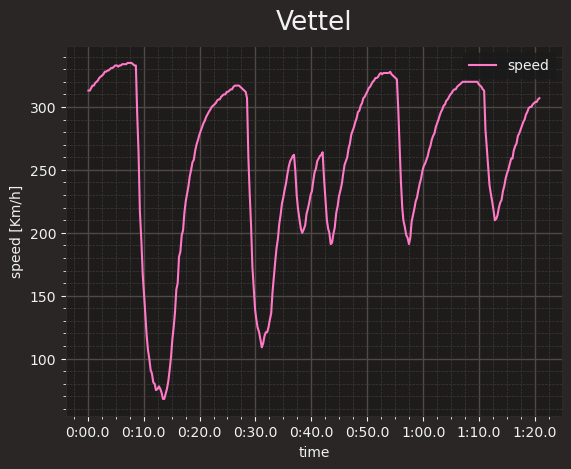

In [25]:
plotting.setup_mpl()
fast_vettel = session.laps.pick_driver('VET').pick_fastest()
print(fast_vettel)
vet_car_data = fast_vettel.get_car_data()
print(vet_car_data)
t = vet_car_data['Time']
vCar = vet_car_data['Speed']

fig, ax = plt.subplots()
ax.plot(t, vCar, label='speed')
ax.set_xlabel('time')
ax.set_ylabel('speed [Km/h]')
ax.set_title('Vettel')
ax.legend()
plt.show()